<a href="https://colab.research.google.com/github/araujorobert/Multivariant-Statistics/blob/main/Distribuciones_normales_bivariadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy 
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
from math import pi
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves

In [ ]:
# vector de medias y matriz de covarianza
mean = [0,0]
cov = [[1,0],[0,1]]

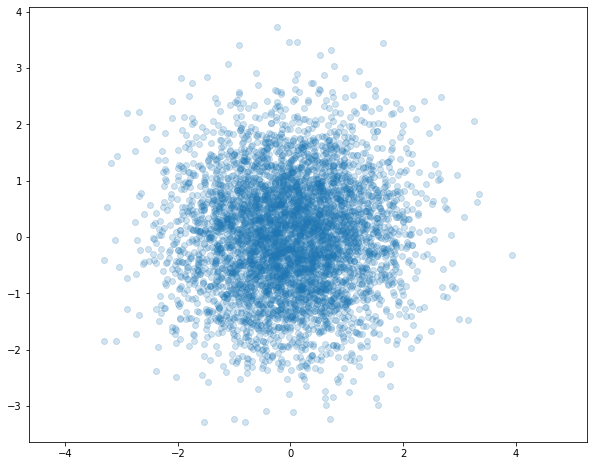

In [ ]:
# Ploteamos una distribucion normal multivariante de media mu y covarianza cov
x,y = np.random.multivariate_normal(mean,cov,5000).T
plt.figure(figsize=(10,8))
plt.plot(x,y,'o',alpha=0.2)
plt.axis('equal')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


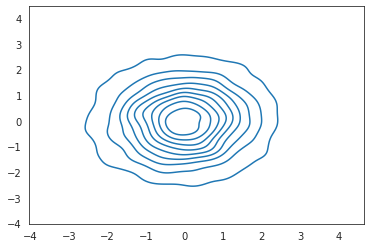

In [ ]:
# Ploteamos la densidad kernel
sb.set_style('white')
sb.kdeplot(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0`, but please update your code.
  warnings.warn(msg, UserWarning)


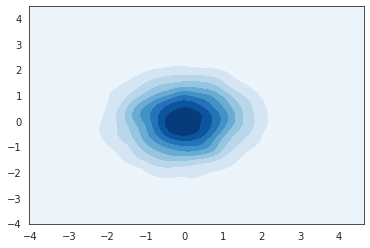

In [ ]:
# Le damos sombra para darle sentido de profundidad
sb.kdeplot(x,y, cmap='Blues', shade=True, shade_lowest=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


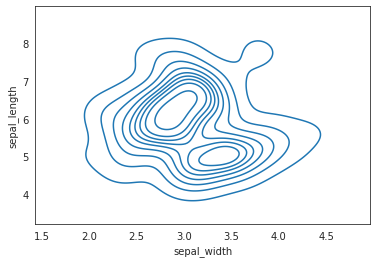

In [ ]:
df = sb.load_dataset('iris')

# ploteamos una densidad kernel con dos variables del dataset "iris"
sb.set_style('white')
sb.kdeplot(df.sepal_width,df.sepal_length)

En el dataset iris hay 3 grupos, sin embargo en graficos anteriores tales como el de coordenadas paralelas y coordenadas radiales hemos visto que dos de ellos son muy similares, es por eso que en el mapa de densidad anterior pareciera solo haber dos.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


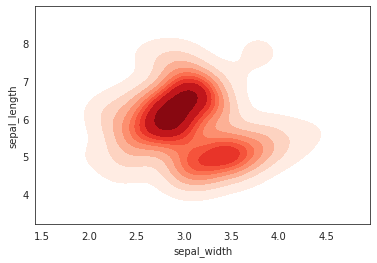

In [ ]:
# Sombreamos la densidad anterior
sb.kdeplot(df.sepal_width,df.sepal_length, cmap='Reds', shade=True)#, bw=0.15)
plt.show()

Generemos una normal bidmensional con media 
$$
\vec{\mu}=(0,0)
$$
y matriz de covarianza
$$
\sigma=(1,0,0,1)
$$

In [ ]:
# generamos una normal 2D y sus contornos para la media y covarianzas anteriores
mu_x = 0
mu_y = 0
x = np.linspace(-5,5,500)
y = np.linspace(-5,5,500)
X,Y = np.meshgrid(x,y)
pos = np.empty(X.shape +(2,))
pos[:,:,0]=X; pos[:,:,1]=Y
rv = multivariate_normal([mu_x,mu_y], [[1,0],[0,1]])

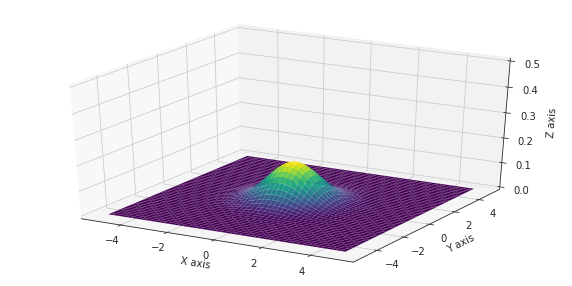

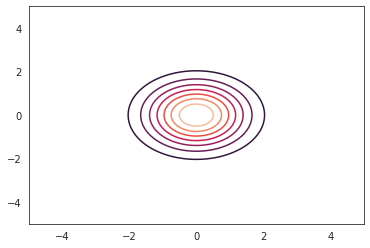

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.auto_scale_xyz([-5,5],[-5,5],[0,0.5])
plt.show()

CS = plt.contour(X,Y,rv.pdf(pos))

Si ahora la matriz de covarianza es:
$$
\sigma=(1,0.7,0.7,1)
$$

In [ ]:
# Repetimos el paso anterior pero ahora introduciendo correlacion en la matriz de covarianza
mu_x = 0
mu_y = 0
x = np.linspace(-5,5,500)
y = np.linspace(-5,5,500)
X,Y = np.meshgrid(x,y)
pos = np.empty(X.shape +(2,))
pos[:,:,0]=X; pos[:,:,1]=Y
rv = multivariate_normal([mu_x,mu_y], [[1,0.7],[0.7,1]])

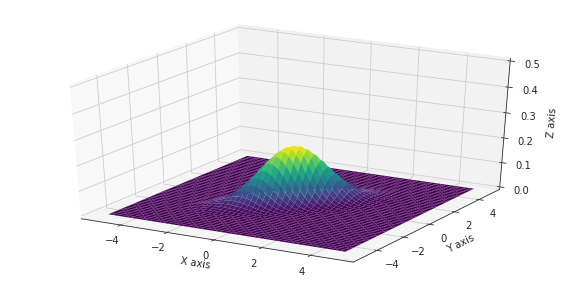

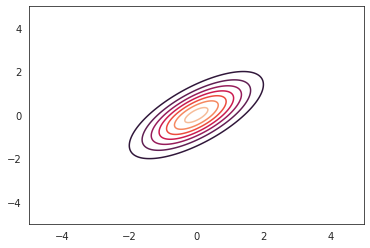

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.auto_scale_xyz([-5,5],[-5,5],[0,0.5])
plt.show()

CS = plt.contour(X,Y,rv.pdf(pos))